# Live Nonlinear Fitting

## Configuration

This code would normally go in a script automatically run at startup. The user would not have to worry about this.

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt

import numpy as np
import lmfit
from bluesky import RunEngine
from bluesky.plans import scan
from ophyd.sim import motor, noisy_det
from bluesky.callbacks import LiveFit, LivePlot, LiveFitPlot
import matplotlib.pyplot as plt

RE = RunEngine({})

/home/travis/virtualenv/python3.7.1/lib/python3.7/site-packages/traitlets/traitlets.py:3036: FutureWarning: --rc={'figure.dpi': 96} for dict-traits is deprecated in traitlets 5.0. You can pass --rc <key=value> ... multiple times to add items to a dict.
  FutureWarning,


## Data Acquisition

In [2]:
fig, ax = plt.subplots() # As before, create plot to be able to follow the progress of the fit during the scan

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [3]:
# define Gaussian function and save it as a model using lmfit
def gaussian(x, A, sigma, x0):
    return A*np.exp(-(x - x0)**2/(2 * sigma**2))

model = lmfit.Model(gaussian)

# The initial guess (gray on the plot) is just a starting point from which the fitting algorithm works.
init_guess = {'A': 2,
              'sigma': lmfit.Parameter('sigma', 3, min=0),
              'x0': -0.2}

In [4]:
# LiveFit example
lf = LiveFit(model, 'noisy_det', {'x': 'motor'}, init_guess)

# now add the plot...
lfp = LiveFitPlot(lf, color='r', ax=ax)

RE(scan([noisy_det], motor, -1, 1, 100), lfp)

('fd10bcb5-0963-4254-bd2a-639a808fa7ac',)

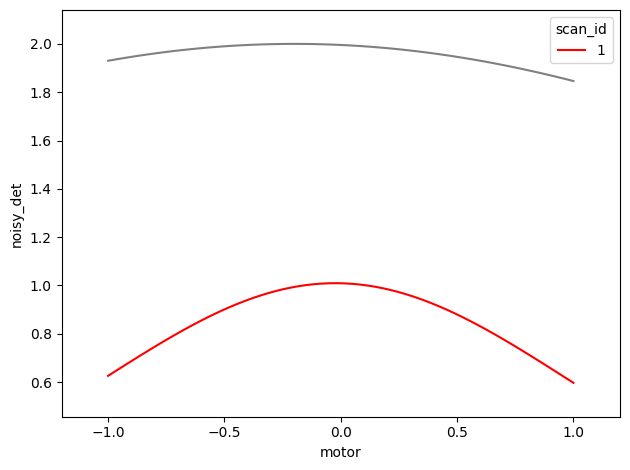

In [5]:
plt.gcf() # Unfortunately, since we do not see the motor positions relative to the fit,
          # we cannot evaluate how well the fit worked.

In [6]:
# Show motor position vs. fit during the scan

fig, ax = plt.subplots()  # explitly create figure to follow fitting

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [7]:
lfp = LiveFitPlot(lf, ax=ax, color='r')
lp = LivePlot('noisy_det', 'motor', ax=ax, marker='o', linestyle='none') # plotting the noisy_det scalar object

RE(scan([noisy_det], motor, -1, 1, 100), [lfp, lp])

('dca623f5-39a3-4772-a717-ed7f125da8f0',)

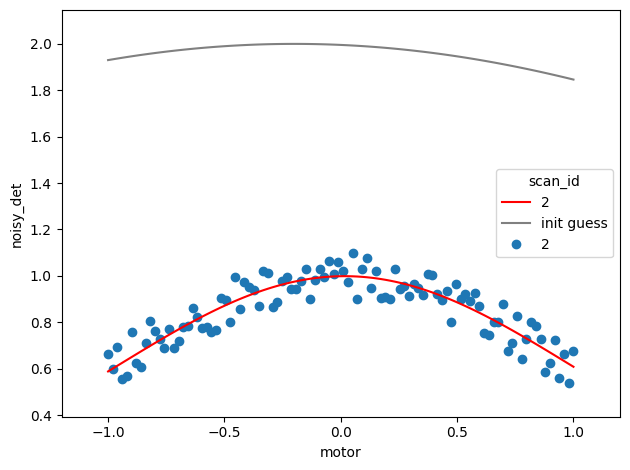

In [8]:
# We can see that from imperfect initial conditions, the fit now matches the data well
plt.gcf() # Display a snapshot of the current state of the figure.

In [9]:
# Get the final fit parameters
lf.result.best_values

{'A': 0.9987981227832291,
 'sigma': 0.9876678664134924,
 'x0': 0.016393155607428593}

## Exercises

1. Try a different user-defined peak-like function to use as a model.